In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from typing import Optional, List, Tuple, Dict
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

class SingleLayerMLP(nn.Module):
    """Constructing a single layer neural network with PyTorch"""
    def __init__(self, indim, outdim, hidden_layer=100):
        super(SingleLayerMLP, self).__init__()
        self.linear1 = nn.Linear(indim, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, outdim)
        
    def forward(self, x):
        """
        x shape (batch_size, indim)
        """
        result = self.linear2(F.relu(self.linear1(x)))
        return result

class DS(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray):
        self.length = len(X)
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(Y, pd.Series) or isinstance(Y, pd.DataFrame):
            Y = Y.values
        
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.long)

    def __getitem__(self, idx):
        x = self.X[idx, :]
        y = self.Y[idx]
        return (x, y)

    def __len__(self):
        return self.length

def validate(loader, model, criterion,optimizer):
    #loss calculation
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    
    avg_loss = running_loss / len(loader)
    #accuracy calculation
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_loader:
            input, labels = data
            outputs = model(input)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
   
    return avg_loss, accuracy

    

In [26]:
if __name__ == "__main__":
    """The dataset loaders were provided for you.
    You need to implement your own training process.
    You need plot the loss and accuracies during the training process and test process. 
    """

    indim = 60
    outdim = 2
    hidden_dim = 100
    lr = 0.01
    batch_size = 64
    epochs = 500

    # Dataset
    Xtrain = pd.read_csv("./data/X_train.csv")
    Ytrain = pd.read_csv("./data/y_train.csv")
    scaler = MinMaxScaler()
    Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns).to_numpy()
    Ytrain = np.squeeze(Ytrain)
    m1, n1 = Xtrain.shape
    print(m1, n1)
    train_ds = DS(Xtrain, Ytrain)
    train_loader = DataLoader(train_ds, batch_size=batch_size)

    Xtest = pd.read_csv("./data/X_test.csv")
    Ytest = pd.read_csv("./data/y_test.csv").to_numpy()
    Xtest = pd.DataFrame(scaler.fit_transform(Xtest), columns=Xtest.columns.to_numpy())
    Ytest = np.squeeze(Ytest)
    m2, n2 = Xtest.shape
    print(m1, n2)
    test_ds = DS(Xtest, Ytest)
    test_loader = DataLoader(test_ds, batch_size=batch_size)

    #create model/optimizer/criterion
    model = SingleLayerMLP(indim, outdim, hidden_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    #training
    for epoch in range(epochs):  
        train_avg_loss, train_accuracy = validate(train_loader, model, criterion, optimizer)
        test_avg_loss, test_accuracy = validate(test_loader, model, criterion, optimizer)

        print(f'Epoch [{epoch+1}/{epochs}], train Loss: {train_avg_loss:.4f}, train Accuracy : {train_accuracy:.2f} ')
        print(f'Epoch [{epoch+1}/{epochs}], test Loss: {test_avg_loss:.4f}, test Accuracy : {test_accuracy:.2f} ')
        
        train_losses.append(train_avg_loss)
        test_losses.append(test_avg_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)


   

1500 60
1500 60
Epoch [1/500], train Loss: 0.6943, train Accuracy : 0.50 
Epoch [1/500], test Loss: 0.6964, test Accuracy : 0.51 
Epoch [2/500], train Loss: 0.6913, train Accuracy : 0.62 
Epoch [2/500], test Loss: 0.6905, test Accuracy : 0.63 
Epoch [3/500], train Loss: 0.6879, train Accuracy : 0.65 
Epoch [3/500], test Loss: 0.6849, test Accuracy : 0.66 
Epoch [4/500], train Loss: 0.6846, train Accuracy : 0.67 
Epoch [4/500], test Loss: 0.6795, test Accuracy : 0.68 
Epoch [5/500], train Loss: 0.6814, train Accuracy : 0.69 
Epoch [5/500], test Loss: 0.6744, test Accuracy : 0.69 
Epoch [6/500], train Loss: 0.6782, train Accuracy : 0.71 
Epoch [6/500], test Loss: 0.6693, test Accuracy : 0.71 
Epoch [7/500], train Loss: 0.6750, train Accuracy : 0.72 
Epoch [7/500], test Loss: 0.6644, test Accuracy : 0.72 
Epoch [8/500], train Loss: 0.6716, train Accuracy : 0.73 
Epoch [8/500], test Loss: 0.6594, test Accuracy : 0.73 
Epoch [9/500], train Loss: 0.6683, train Accuracy : 0.73 
Epoch [9/500],

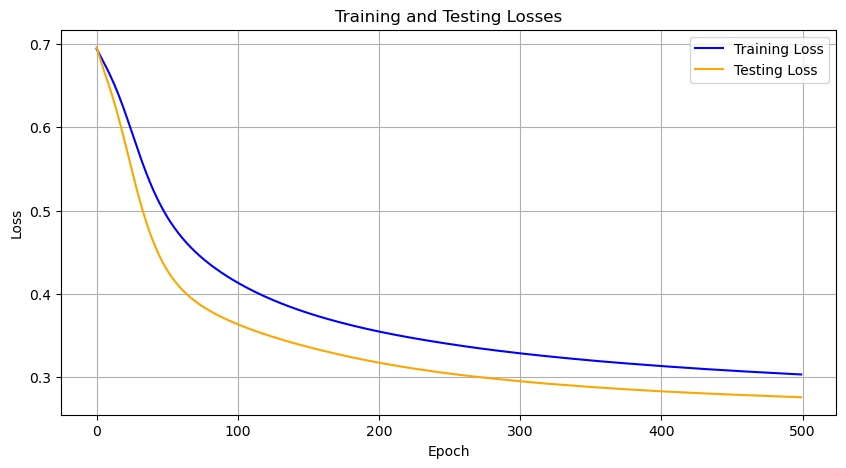

In [27]:
import matplotlib.pyplot as plt

# Plotting the training and testing losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(test_losses, label='Testing Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.grid(True)
plt.show()

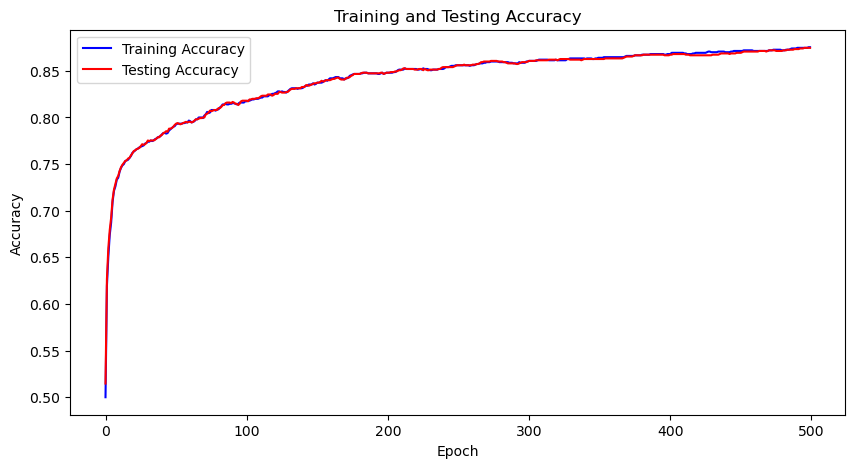

In [28]:
# Plot training and testing accuracy on the same plot
plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.plot(train_accuracies, label='Training Accuracy', color='blue')

# Plot testing accuracy
plt.plot(test_accuracies, label='Testing Accuracy', color='red')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()
